In [75]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [85]:
data = pd.read_csv("../datasets/logreg.csv")
data.sample(frac = 1)
X,Y = data.drop("y", axis = 1),data["y"]


In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)
[[B1,B2]] = model.coef_
[B0] = model.intercept_

In [88]:
hypo = np.dot(weights,X.T) + intercept
prediction = sigmoid(hypo)
print(prediction)

[[0.10224981 0.02502684 0.10850275 0.02736265 0.11917298 0.97040723
  0.73366364 0.95300013 0.99699747 0.96361841]]


In [89]:
for i in range(len(prediction[0])):
    if prediction[0][i]>0.5:
        prediction[0][i] = 1
    else:
        prediction[0][i] = 0


In [90]:
print(np.sum(y==prediction[0])/len(prediction[0])*100 , "%")

100.0 %


In [91]:
p = []
l = []
e = []
for i in range(len(X)):
    instance = X.iloc[i]
    pred = 1/(1+np.exp(-(B0 + B1*instance[0] + B2*instance[1])))
    loss = round(pred)-y[i]
    error = pred - y[i]
    e.append(error)
    p.append(round(pred))
    l.append(loss)
    print(f"For X={instance[0], instance[1]}, pred={round(pred)}, loss={loss}, predWithRound={pred}, error={error}")


For X=(2.781084, 2.550537), pred=0, loss=0, predWithRound=0.1022498125742718, error=0.1022498125742718
For X=(1.465489, 2.362125), pred=0, loss=0, predWithRound=0.02502684032438537, error=0.02502684032438537
For X=(3.396562, 4.400294), pred=0, loss=0, predWithRound=0.10850275313408725, error=0.10850275313408725
For X=(1.38807, 1.85022), pred=0, loss=0, predWithRound=0.027362648385509735, error=0.027362648385509735
For X=(3.064072, 3.005306), pred=0, loss=0, predWithRound=0.11917297565982612, error=0.11917297565982612
For X=(7.627531, 2.759262), pred=1, loss=0, predWithRound=0.970407230498633, error=-0.029592769501367022
For X=(5.332441, 2.088627), pred=1, loss=0, predWithRound=0.7336636387683158, error=-0.26633636123168425
For X=(6.922597, 1.771064), pred=1, loss=0, predWithRound=0.9530001344329782, error=-0.04699986556702185
For X=(8.675419, -0.24207), pred=1, loss=0, predWithRound=0.9969974711350023, error=-0.0030025288649977444
For X=(7.673756, 3.508563), pred=1, loss=0, predWithRou

In [92]:
print(np.sum(y==p)/len(p)*100 , "%")

100.0 %


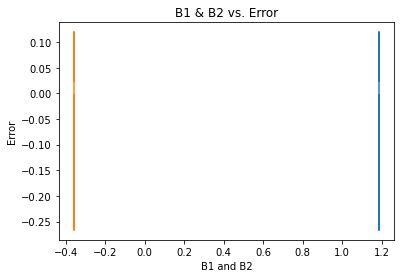

In [93]:
b1_val = np.array(B1)
b1_val = np.repeat(b1_val, 10)
b2_val = np.array(B2)
b2_val = np.repeat(b2_val, 10)
plt.plot(b1_val, e)
plt.plot(b2_val, e)
plt.xlabel('B1 and B2')
plt.ylabel('Error')
plt.title('B1 & B2 vs. Error')
plt.show()